# Libraries

In [1]:
import cloudpickle as pickle

In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
import matplotlib.pyplot as plt

# Loading the data

In [5]:
data_path = r'D:\temps\mnist.pkl'

In [6]:
with open(data_path, 'rb') as f:
    (x_train, y_train), (x_val, y_val), (x_test, y_test) = pickle.load(f, encoding='latin-1')

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)
(10000,)


In [8]:
x_train = x_train.reshape((50000, 28, 28, 1))
x_val = x_val.reshape((10000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [9]:
encoder = OneHotEncoder(categories=[range(10)], sparse=False)

In [10]:
encoder.fit(np.array([0,1,2,3,4,5,6,7,8,9]).reshape(10,1))

OneHotEncoder(categorical_features=None, categories=[range(0, 10)],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [11]:
y_train = encoder.transform(y_train.reshape(len(y_train), 1))
y_val = encoder.transform(y_val.reshape(len(y_val), 1))
y_test = encoder.transform(y_test.reshape(len(y_test), 1))

In [12]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)
(10000, 10)


# Keras

In [13]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## First model with 2 conv but 25k parameters

In [29]:
class CNN1:
    
    def __init__(self):
        np.random.seed(0)
        tf.set_random_seed(0)
        self.model = keras.models.Sequential()
        self.history = None
        
        # Layer 1
        self.model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', use_bias=True,
                              activation='relu', input_shape=(28,28,1), data_format='channels_last'))
        self.model.add(MaxPooling2D(2, padding='valid', data_format='channels_last'))
        
        # Layer 2
        self.model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', use_bias=True,
                              activation='relu', input_shape=(14,14,32), data_format='channels_last'))
        self.model.add(MaxPooling2D(2, padding='valid', data_format='channels_last'))
        
        # Flattening
        self.model.add(Flatten())
        
        # Layer 3
        self.model.add(Dense(10, use_bias=True, activation='softmax'))
        
        sgd = keras.optimizers.SGD(lr=0.01)
        self.model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
        
        self.model.summary()
    
    def train(self, x_tr, y_tr, x_v, y_v, ep, bs=32, early=10):
        self.history = self.model.fit(x_tr, y_tr, validation_data=(x_v, y_v), epochs=ep, batch_size=bs)

In [15]:
mod1 = CNN1()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 25,258
Trainable params: 25,258
Non-trainable params: 0
_________________________________________________________________


In [16]:
mod1.train(x_train, y_train, x_val, y_val, 10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 41s 827us/step - loss: 0.6073 - acc: 0.8229 - val_loss: 0.2720 - val_acc: 0.9178
Epoch 2/10
50000/50000 [==============================] - 42s 831us/step - loss: 0.2067 - acc: 0.9387 - val_loss: 0.1466 - val_acc: 0.9587
Epoch 3/10
50000/50000 [==============================] - 43s 864us/step - loss: 0.1394 - acc: 0.9583 - val_loss: 0.1082 - val_acc: 0.9701
Epoch 4/10
50000/50000 [==============================] - 43s 868us/step - loss: 0.1084 - acc: 0.9679 - val_loss: 0.0914 - val_acc: 0.9762
Epoch 5/10
50000/50000 [==============================] - 42s 834us/step - loss: 0.0923 - acc: 0.9729 - val_loss: 0.0827 - val_acc: 0.9763
Epoch 6/10
50000/50000 [==============================] - 42s 832us/step - loss: 0.0817 - acc: 0.9759 - val_loss: 0.0795 - val_acc: 0.9771
Epoch 7/10
50000/50000 [==============================] - 41s 827us/step - loss: 0.0733 - acc: 0.9780 - val_loss: 0.

Plotting the accuracy and the loss function at each epoch:

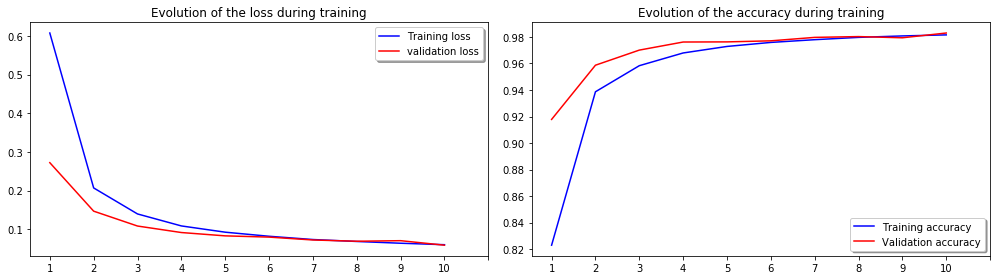

In [36]:
history = mod1.history
epochs = history.params['epochs']

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.xticks(np.arange(0, epochs+1, 1), [str(x) for x in np.arange(1, epochs+1, 1)])
plt.legend(loc='best', shadow=True)
plt.title('Evolution of the loss during training')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
plt.xticks(np.arange(0, epochs+1, 1), [str(x) for x in np.arange(1, epochs+1, 1)])
plt.legend(loc='best', shadow=True)
plt.title('Evolution of the accuracy during training')

plt.tight_layout()
plt.show()

Checking the performances on the test set:

In [28]:
l, acc = mod1.model.evaluate(x_test, y_test)
print('Test loss:', l)
print('Test accuracy:', acc)

10000/10000 [==============================] - 3s 270us/step
Test loss: 0.05291663206070662
Test accuracy: 0.9831


As we have just seen, we don't even need that many parameters to beat the MLP we built in the first part. In order to follow the guidelines, we still built a convolutional neural net with as many parameters as the one we built in the first part.

***

## Second model with 3 conv and 600k parameters (to compare with MLP)

In [30]:
class CNN2:
    
    def __init__(self):
        np.random.seed(0)
        tf.set_random_seed(0)
        self.model = keras.models.Sequential()
        self.history = None
        
        # Layer 1
        self.model.add(Conv2D(64, kernel_size=3, strides=1, padding='same', use_bias=True,
                              activation='relu', input_shape=(28,28,1), data_format='channels_last'))
        self.model.add(MaxPooling2D(2, padding='valid', data_format='channels_last'))
        
        # Layer 2
        self.model.add(Conv2D(128, kernel_size=3, strides=1, padding='same', use_bias=True,
                              activation='relu', input_shape=(14,14,32), data_format='channels_last'))
        
        # Layer 3
        self.model.add(Conv2D(128, kernel_size=3, strides=1, padding='same', use_bias=True,
                              activation='relu', input_shape=(14,14,32), data_format='channels_last'))
        self.model.add(MaxPooling2D(2, padding='valid', data_format='channels_last'))
        
        # Flattening
        self.model.add(Flatten())
        
        # Layer 4
        self.model.add(Dense(64, use_bias=True, activation='relu'))
        
        # Layer 5
        self.model.add(Dense(10, use_bias=True, activation='softmax'))
        
        sgd = keras.optimizers.SGD(lr=0.01)
        self.model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
        
        self.model.summary()
    
    def train(self, x_tr, y_tr, x_v, y_v, ep, bs=32, early=10):
        self.history = self.model.fit(x_tr, y_tr, validation_data=(x_v, y_v), epochs=ep, batch_size=bs)

In [31]:
mod2 = CNN2()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                401472    
__________

In [32]:
mod2.train(x_train, y_train, x_val, y_val, 10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 276s 6ms/step - loss: 0.6091 - acc: 0.8280 - val_loss: 0.1785 - val_acc: 0.9439
Epoch 2/10
50000/50000 [==============================] - 282s 6ms/step - loss: 0.1259 - acc: 0.9609 - val_loss: 0.0877 - val_acc: 0.9745
Epoch 3/10
50000/50000 [==============================] - 294s 6ms/step - loss: 0.0862 - acc: 0.9735 - val_loss: 0.0810 - val_acc: 0.9760
Epoch 4/10
50000/50000 [==============================] - 294s 6ms/step - loss: 0.0672 - acc: 0.9788 - val_loss: 0.0710 - val_acc: 0.9785
Epoch 5/10
50000/50000 [==============================] - 291s 6ms/step - loss: 0.0566 - acc: 0.9823 - val_loss: 0.0576 - val_acc: 0.9833
Epoch 6/10
50000/50000 [==============================] - 293s 6ms/step - loss: 0.0484 - acc: 0.9851 - val_loss: 0.0527 - val_acc: 0.9833
Epoch 7/10
50000/50000 [==============================] - 343s 7ms/step - loss: 0.0427 - acc: 0.9868 - val_loss: 0.0487 - 

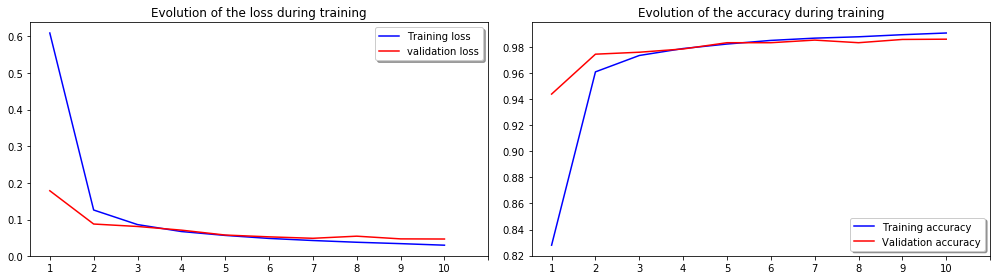

In [37]:
history = mod2.history
epochs = history.params['epochs']

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.xticks(np.arange(0, epochs+1, 1), [str(x) for x in np.arange(1, epochs+1, 1)])
plt.legend(loc='best', shadow=True)
plt.title('Evolution of the loss during training')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
plt.xticks(np.arange(0, epochs+1, 1), [str(x) for x in np.arange(1, epochs+1, 1)])
plt.legend(loc='best', shadow=True)
plt.title('Evolution of the accuracy during training')

plt.tight_layout()
plt.show()

In [38]:
l, acc = mod1.model.evaluate(x_test, y_test)
print('Test loss:', l)
print('Test accuracy:', acc)

10000/10000 [==============================] - 3s 271us/step
Test loss: 0.05291663206070662
Test accuracy: 0.9831


We reached 97% validation accuracy on the second epoch !